# Data pre-processing and Merging of all the table in one

In [1]:
# Importing important libraries 
import pandas as pd 
import datetime as dt
import os                                                                                                     

In [3]:
file = os.listdir(r"C:\Users\Vaishali Tomar\Desktop\chace_test") # List of All the spreadsheets of 5 years.
file

['Rice Exporters 2018.xlsx',
 'Rice Exporters 2019.xlsx',
 'Rice Exporters 2020.xlsx',
 'Rice Exporters 2021.xlsx',
 'Rice Exporters 2022.xlsx',
 'Vishal_tomer_assignment.ipynb']

### Merging all the sheets of All five Workbook to one Data frame

In [10]:
finaldf = pd.DataFrame()   # Empty dataframe
for i in  file:
    xls = pd.ExcelFile(r"C:/Users/Vaishali Tomar/Desktop/chace_test/"+i)  # Reading all the sheets in every Excel Workbook in a loop from 2018 to 2022
    sheets = xls.book.worksheets 
    
    lis = []
    for sheet in sheets:       # Another loop for selecting only "VISIBLE" sheets avoiding all the "hidden" sheets.
        if sheet.sheet_state == 'visible':
            lis.append(sheet.title) # Appending all the visible sheet in a list

    s = pd.read_excel(r"C:/Users/Vaishali Tomar/Desktop/chace_test/"+i,sheet_name = lis)# Merging all the sheets of a Workbook in "lis" column to one.
    
    df = pd.concat(s[frame] for frame in s.keys()) # Concatinate them one by one
    
    finaldf = pd.concat([finaldf,df]) # Finally making one single table  by Concatinating them one by one from 2018 to 2022 with "finaldf"


In [11]:
finaldf.shape # shape of final table 

(428548, 48)

In [12]:
finaldf.isnull().sum() # checking null values

NO                            0
ARRIVAL DATE                  0
HS CODE                       0
HS CODE DESCRIPTION        2318
IMPORTER NAME              2614
IMPORTER ADDRESS           5430
IMPORTER COUNTRY              0
CITY STATE                  187
TEL                       10851
FAX                       12549
E-MAIL                     8813
WEB                       15968
EXPORTER NAME              2024
EXPORTER ADDRESS          31116
COUNTRY OF ORIGIN             0
IMPORT VALUE FOB              0
IMPORT VALUE CIF              0
CURRENCY                  13133
NET WEIGHT                    0
NET WEIGHT UNIT          399546
GROSS WEIGHT                  0
GROSS WEIGHT UNIT        394456
QUANTITY                      0
QUANTITY UNIT             20792
PRODUCT DETAILS            5535
NUMBER OF PACKAGES            0
PACKAGES UNIT            414184
INCOTERMS                421440
PLACE OF DELIVERY        423542
BRAND NAME               424247
MANUFACTORING COMPANY    425219
PORT OF 

In [13]:
df = finaldf[['ARRIVAL DATE','HS CODE','HS CODE DESCRIPTION','IMPORTER NAME','IMPORTER COUNTRY','CITY STATE','EXPORTER NAME','EXPORTER ADDRESS'	,'COUNTRY OF ORIGIN','IMPORT VALUE FOB','CURRENCY','QUANTITY','QUANTITY UNIT','PRODUCT DETAILS'	,'PORT OF ARRIVAL',	'PORT OF DEPARTURE']]
df.head(2) # Only selecting those Attributes which are not null and Important for Data analization .

,ARRIVAL DATE,HS CODE,HS CODE DESCRIPTION,IMPORTER NAME,IMPORTER COUNTRY,CITY STATE,EXPORTER NAME,EXPORTER ADDRESS,COUNTRY OF ORIGIN,IMPORT VALUE FOB,CURRENCY,QUANTITY,QUANTITY UNIT,PRODUCT DETAILS,PORT OF ARRIVAL,PORT OF DEPARTURE
0,2018-01-30 03:00:00,10063090,Rice Excptg Parboiled (Excl Basmati Rice),WALQ GENERAL TRADING,United Arab Emirates,United Arab Emirates,SCM AGROTECH ENTERPRISES PRIVATE LIMITED,"165&166A,ZONE1-M.P NAGAR, ,BHOPAL,MADHYA PRA...",India,25970.76,USD,50.04,MTS,SONAMASOORI NON BASMATI RICE PKD IN 18 K G PP BAG,Jebel Ali,Mundra SEA (INMUN1)
1,2018-01-30 03:00:00,10063090,Rice Excptg Parboiled (Excl Basmati Rice),FINE WAY INTERNATIONAL TRADING LLC.,United Arab Emirates,United Arab Emirates,SRI RAMA MODERN & PARA BOILED RICE MILL,"SARANGAPUR VILLAGENIZAMABAD. ,ANDHRA PRADESH...",India,25945.92,USD,48.05,MTS,SONA MASURI RICE NON BASMATI RICE 1320 N ON WO...,Jebel Ali,Mundra SEA (INMUN1)


In [14]:
df.drop_duplicates(keep=False,inplace=True)  # droping Duplicate rows

C:\Users\Vaishali Tomar\AppData\Local\Temp\ipykernel_6804\4160054199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep=False,inplace=True)  # droping Duplicate rows


In [302]:

from forex_python.converter import CurrencyRates # importing currencynconverter 
c = CurrencyRates()  

In [15]:
# Dictionary of all the different currencies with respect to "USD".
Curr_rates = {
'EUR': 0.9100837277029487,'JPY': 128.4310156534401,'BGN': 1.779941754641427,'CZK': 21.668183472879505,'DKK': 6.770385875500546,'GBP': 0.8126046596286858,
'HUF': 352.3844193665817,'PLN': 4.278758645795413,'RON': 4.461685475063706,'SEK': 10.337368037859484,'CHF': 0.9093556607207863,'ISK': 139.69785220240263,
'NOK': 9.96860211139425,'TRY': 18.817437204222788,'AUD': 1.402165999271933,'BRL': 4.992628321805606,'CAD': 1.3289042591918456,'CNY': 6.7235165635238445,'HKD': 7.843374590462322,
'IDR': 14889.597742992355,'INR': 82.18192573716783,'KRW': 1224.8816891153988,'MXN': 18.570258463778668,'MYR': 4.245995631598107,'NZD': 1.53394612304332,
'PHP': 53.84965416818348,'SGD': 1.3061521659992719,'THB': 32.790316709137244,'ZAR': 17.022752093192572,'MTS':.016,'KES':124.75,'AED':3.67,
'LKR':364,'MZN':63.83,'XOF':600,'MDL':18.77,'QAR':3.64,'KWD':.31,'GHS':12.35,'NGN':460.54,'UGX':3683,'GHC':12.25,'RUR':70.65,
'UAH':36.93,'TZS':2339,'ETB':53.68,'FJD':2.17,'RUB':70.65,'KZT':458.03,'SAR':3.75
 }

In [16]:
# Converting All the currencies in "USD" (US Dollar)  
col = [] 
for i in df.index:
    Key = df.iloc[i]['CURRENCY']  # diff currency in "CURRENCY" COLUMN in a loop.

    if Key in Curr_rates.keys(): # checking if that currency in "Curr_rates" dictionary.
    
        col.append(df.iloc[i]['IMPORT VALUE FOB']//Curr_rates[Key])  # converting All the amount in "IMPORT VALUE FOB" to "USD" and appending them
    else:
        col.append(1*df.iloc[i]['IMPORT VALUE FOB'])  # Else condition for those which are already in "USD" and appending them

df['IMPORT VALUE FOB IN USD'] = col # Adding column to DataFrame

C:\Users\Vaishali Tomar\AppData\Local\Temp\ipykernel_6804\2706662799.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IMPORT VALUE FOB IN USD'] = col # Adding column to DataFrame


In [17]:
# Converting All the Quantity in one single unit "kg".

quantity_dict={'kg':1,'KGS':1,'KG': 1,'Kg':1,'MTS':1000, 'BAG': 43,'NOS': 0.10197, 'PCS': 1.66, 'KGM': 1,'CTN': 10,'BAG': 42.637, 'TON':1000,
            'KILOGRAMOS NETOS':1000,'Kgm':1, 'KILOGRAMMES':1,'QTL':100,'kilos':1,'BG':43,'Net kg':1, 'LOT':0.0127,'Kilogram':1,'CRT':0.0002,
             'SET':6.4, 'Kilogramos':1, 'Tonelada': 1000, 'BGS':43, 'TONS':1000,'LBS': 0.454, 'GMS': 0.001, 'Kilo':1, 'TBN':907.18, 'BX':0.13,
             'PK':1, 'CT':0.0002, 'NET KG':1, 'PD':0.454, 'TONELADA':1000, 'Toneladas':1000, 'SA':3.24, 'TNE': 1000, 'BAGS': 43, 'LTR': 0.92,
             'KILOGRAMO BRUTO': 1, 'DRM': 0.468, 'KLR': 0.92, 'UNK': 1016, 'KILOS': 1, 'KILOGRAM': 1, 'KGA':1, 'CTM': 0.0002, 'Kg.': 1, 
              'Tons': 1000, 'KILO': 1, 'KILOGRAMO': 1
              } # dictionary of values of quantity with respect to "one Kg".

In [18]:
# converting   Quantity unit to one (Kg).
quant = []
for i in df.index:
    Key = df.iloc[i]['QUANTITY UNIT'] # diff UNIT in "QUANTITY UNIT" column as key.

    if Key in quantity_dict.keys(): # Checking if key is in "quantity_dict" Dictionary.

        quant.append(quantity_dict[Key]*df.iloc[i]['QUANTITY'])  # converting UNIT in "QUANTITY UNIT" column and appending it in "quant"
    else:

        quant.append(df.iloc[i]['QUANTITY'])

df['quantity_in_kg'] = quant # Adding column to DataFrame

C:\Users\Vaishali Tomar\AppData\Local\Temp\ipykernel_6804\1848554293.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity_in_kg'] = quant # Adding column to DataFrame


#### This is the code which I have written to convert all "currency" according to given time and date but as the rows are more than 4 lakh it is taking nearly 10 hour to run.




import numpy as np

Amount = []

for i in df.index:

    amount= df['IMPORT VALUE FOB'][i-1:i,].max()
    curr = df['CURRENCY'][i-1:i,].max()

    date = pd.to_datetime(df['ARRIVAL DATE'][i-1:i,].max())

    try:
        Amount.append((c.convert(curr,'USD',amount,date)))  ## converting currency  with time to usd 

    except:
        Amount.append(np.nan)

# Driven Insights from data

####  Insight1 -  The top exporters in the last 5 years with the location they export to, total quantity exported, any other relevant data point you feel will be helpful


In [127]:
df['quantity_in_tonne'] = df['quantity_in_kg']//1000 # converting kg to ton

df['IMPORT VALUE FOB IN USD IN MILLION$'] = df['IMPORT VALUE FOB IN USD']//1000000

C:\Users\Vaishali Tomar\AppData\Local\Temp\ipykernel_6804\140627601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity_in_tonne'] = df['quantity_in_kg']//1000 # converting kg to ton
C:\Users\Vaishali Tomar\AppData\Local\Temp\ipykernel_6804\140627601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IMPORT VALUE FOB IN USD IN MILLION$'] = df['IMPORT VALUE FOB IN USD']//1000000


In [160]:
# With Respect to FOB value
dg = df[['EXPORTER NAME','IMPORTER COUNTRY','quantity_in_tonne','IMPORT VALUE FOB IN USD IN MILLION$']]  # filtring table 

# top five
# group by 'EXPORTER NAME','IMPORTER COUNTRY' and ascending sum('IMPORT VALUE FOB IN USD') in descending order
dg = dg.groupby(['EXPORTER NAME','IMPORTER COUNTRY']).aggregate({'quantity_in_tonne':'sum','IMPORT VALUE FOB IN USD IN MILLION$':'sum'}).sort_values(by=['IMPORT VALUE FOB IN USD IN MILLION$'], ascending = [False]).reset_index().head(5)
dg

,EXPORTER NAME,IMPORTER COUNTRY,quantity_in_tonne,IMPORT VALUE FOB IN USD IN MILLION$
0,RAJESH TRADING CO,Bhutan,300132.0,298.0
1,L.T.FOODS LTD,United Arab Emirates,17199.0,270.0
2,NAVYAA FOODS,Egypt,7303.0,270.0
3,SAKTHI EXPORTERS,Singapore,36460.0,268.0
4,R S RICE MILLS,United States,33244.0,267.0


#### Insight2 - The top importers and country 

In [139]:
# With Respect to FOB value top 5 
dg = df[['IMPORTER NAME','IMPORTER COUNTRY','quantity_in_tonne','IMPORT VALUE FOB IN USD IN MILLION$']]  # filtring table 

# top five
# group by 'IMPORTER NAME','IMPORTER COUNTRY' and ascending sum('IMPORT VALUE FOB IN USD') in descending order
dg.groupby(['IMPORTER NAME','IMPORTER COUNTRY']).aggregate({'quantity_in_tonne':'sum','IMPORT VALUE FOB IN USD IN MILLION$':'sum'}).sort_values(by=['IMPORT VALUE FOB IN USD IN MILLION$'], ascending = [False]).head(5)



,,quantity_in_tonne,IMPORT VALUE FOB IN USD IN MILLION$
IMPORTER NAME,IMPORTER COUNTRY,,
LT FOODS MIDDLE EAST DMCC.,United Arab Emirates,24992.0,270.0
KHOR BARKA TRADING ENTERPRISES,Egypt,5364.0,270.0
ALLIANCE DIVINE IMPEX PTE.LTD.,Singapore,64578.0,268.0
"HOUSE OF SPICES OF INDIA, INC.",United States,215763.0,188.0
FYVE ELEMENTS LLC.,United States,125943.0,185.0


#### Insight3 - The top port's for rice exports

In [140]:
# With Respect to Quantity, top five ports
dg = df[['PORT OF DEPARTURE','quantity_in_tonne']]  # filtring table 

# group by 'PORT OF DEPARTURE' and ascending sum('quantity_in_kg') in descending order
dg[['PORT OF DEPARTURE','quantity_in_tonne']].groupby(['PORT OF DEPARTURE']).aggregate({'quantity_in_tonne':'sum'}).sort_values(by=['quantity_in_tonne'], ascending = [False]).head(5)

,quantity_in_tonne
PORT OF DEPARTURE,
MUNDRA SEA (INMUN1),5592837.0
COCHIN SEA (INCOK1),2658562.0
NHAVA SHEVA SEA (INNSA1),1628375.0
LCS JAIGAON (INJIGB),1495052.0
CHENNAI SEA (INMAA1),1370135.0


In [141]:
# With Respect to FOB value, top five ports
dg = df[['PORT OF DEPARTURE','IMPORT VALUE FOB IN USD IN MILLION$']]  # filtring table 

# group by 'PORT OF DEPARTURE' and ascending sum('IMPORT VALUE FOB IN USD') in descending order
dg.groupby(['PORT OF DEPARTURE']).aggregate({'IMPORT VALUE FOB IN USD IN MILLION$':'sum'}).sort_values(by=['IMPORT VALUE FOB IN USD IN MILLION$'], ascending = [False]).head(5)

,IMPORT VALUE FOB IN USD IN MILLION$
PORT OF DEPARTURE,
MUNDRA SEA (INMUN1),4139.0
NHAVA SHEVA SEA (INNSA1),1153.0
COCHIN SEA (INCOK1),957.0
SONEPAT ICD (INBDM6),888.0
Mundra SEA (INMUN1),866.0


#### Insight - 4 The trend of rice exporters over time

In [24]:
##  trend of number of exporter per year.

df['Year'] = df['ARRIVAL DATE'].dt.year # adding attribute of "Year"

dg = df[['Year','EXPORTER NAME']].groupby('Year') # group by "year"

dg = dg.nunique().add_suffix('_COUNT').reset_index() # count of unique exporter every year
dg

C:\Users\Vaishali Tomar\AppData\Local\Temp\ipykernel_6804\1871009013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['ARRIVAL DATE'].dt.year # adding attribute of "Year"


,Year,EXPORTER NAME_COUNT
0,2018,3045
1,2019,2767
2,2020,3490
3,2021,5768
4,2022,4220


<AxesSubplot:xlabel='Year'>

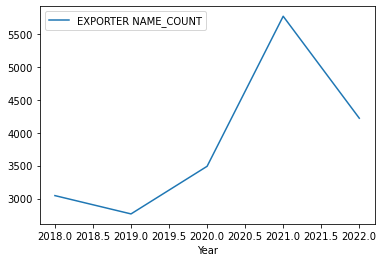

In [25]:
dg.plot(x='Year', y = 'EXPORTER NAME_COUNT')

In [130]:
##  trend of Total FOB value  per year.
df['Year'] = df['ARRIVAL DATE'].dt.year # adding attribute of "Year"

dg = df[['Year','IMPORT VALUE FOB IN USD IN MILLION$']].groupby('Year') # group by "year"

dg = dg.sum().reset_index() # count of unique exporter every year
dg

C:\Users\Vaishali Tomar\AppData\Local\Temp\ipykernel_6804\3796021176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['ARRIVAL DATE'].dt.year # adding attribute of "Year"


,Year,IMPORT VALUE FOB IN USD IN MILLION$
0,2018,3516.0
1,2019,3150.0
2,2020,4662.0
3,2021,5252.0
4,2022,4656.0


<AxesSubplot:xlabel='Year'>

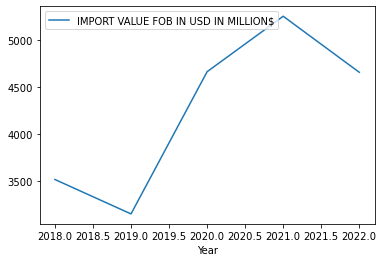

In [131]:
dg.plot(x='Year', y = 'IMPORT VALUE FOB IN USD IN MILLION$')

In both the line graphs value is decreasing feom 2021 to 2022 and that is time when covid 19 is on peak in India.

#### Insight5 - Top  5 countries 

In [132]:
# Top 5 countries  with respect to "FOB value"
dg_value = df[['IMPORTER COUNTRY','IMPORT VALUE FOB IN USD IN MILLION$']].groupby('IMPORTER COUNTRY').aggregate({'IMPORT VALUE FOB IN USD IN MILLION$':'sum'}) # group by year aggretion by IMPORT VALUE FOB IN USD'

dg_value.sort_values(by='IMPORT VALUE FOB IN USD IN MILLION$', ascending=False).head() # sort in descending order 

,IMPORT VALUE FOB IN USD IN MILLION$
IMPORTER COUNTRY,
United Arab Emirates,2358.0
United States,1634.0
Nepal,1389.0
Bangladesh,1244.0
Canada,1124.0


In [142]:
# Top 5 countries with respect to "quantity"
dg_quantity = df[['IMPORTER COUNTRY','quantity_in_tonne']].groupby('IMPORTER COUNTRY').aggregate({'quantity_in_tonne':'sum'}) # group by year aggretion by 'quantity_in_kg'

dg_quantity.sort_values(by='quantity_in_tonne', ascending=False).head() # sort in descending order

,quantity_in_tonne
IMPORTER COUNTRY,
Nepal,3602180.0
United Arab Emirates,3156031.0
United States,2942499.0
Bhutan,2234236.0
Bangladesh,1902978.0


United Arab Emirates on top in terms of "FOB Value" second in terms of "quantity"

Nepal on top in terms of "quantity" second ijn terms of "FOB value"

#### Insight - 6 Top Importer Countries In terms of FOB value Contribution

In [144]:
dg = df[['IMPORTER COUNTRY','IMPORT VALUE FOB IN USD IN MILLION$']].groupby('IMPORTER COUNTRY').aggregate({'IMPORT VALUE FOB IN USD IN MILLION$':'sum'}) # group by year aggretion by IMPORT VALUE FOB IN USD'

dg = dg.sort_values(by='IMPORT VALUE FOB IN USD IN MILLION$', ascending=False).head(10).reset_index() # sort in descending order

dg['Percentage'] = round(dg['IMPORT VALUE FOB IN USD IN MILLION$']/sum(df['IMPORT VALUE FOB IN USD IN MILLION$'])*100,2)  # finding Percentage


In [145]:
dg = dg[['IMPORTER COUNTRY','Percentage']]

dg.loc[len(dg.index)] =['Other',round(100-sum(dg['Percentage']),2)] # Inserting row named "Other"
dg

,IMPORTER COUNTRY,Percentage
0,United Arab Emirates,11.10
1,United States,7.69
2,Nepal,6.54
3,Bangladesh,5.86
4,Canada,5.29
5,Bhutan,5.00
6,Saudi Arabia,3.89
7,Singapore,3.55
8,Oman,2.80
9,Australia,2.74


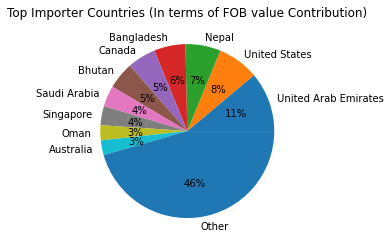

In [146]:
# pie chart of above chart
import matplotlib.pyplot as plt

pie_chart = plt.pie(dg["Percentage"], labels = dg["IMPORTER COUNTRY"],autopct='%1.0f%%')
plt.title('Top Importer Countries (In terms of FOB value Contribution)')
plt.show()

In [147]:
df['IMPORTER COUNTRY'].nunique() # Total Importer countires

191

Out of 191 counties 10 countries consist of 55 percent contribution In terms of  FOB value.

#### Top 4 products in terms of FOB values.

In [137]:
df[['HS CODE DESCRIPTION','IMPORT VALUE FOB IN USD IN MILLION$']].groupby('HS CODE DESCRIPTION').aggregate({'IMPORT VALUE FOB IN USD IN MILLION$':'sum'}).sort_values(by='IMPORT VALUE FOB IN USD IN MILLION$',ascending = False).head(4)

,IMPORT VALUE FOB IN USD IN MILLION$
HS CODE DESCRIPTION,
Basmati Rice,6724.0
Rice Excptg Parboiled (Excl Basmati Rice),5819.0
"Rice, parboiled",5815.0
Semi-Milled Or Wholly Milled Rice,663.0


In [46]:
# ADDING DATE COLUMN
df['day']=df['ARRIVAL DATE'].dt.day_name()
df['only_date'] = pd.to_datetime(df['ARRIVAL DATE']).dt.date # ONLY DATE


C:\Users\Vaishali Tomar\AppData\Local\Temp\ipykernel_6804\135412460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day']=df['ARRIVAL DATE'].dt.day_name()


dtype('<M8[ns]')

### Average shipment perday

In [93]:
# unique days
date = []
for i in df['only_date'].unique():
    date.append(i)

df1 = pd.DataFrame({'date':date})


df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

df1['day'] = df1['date'].dt.day_name()
A = df1['day'].value_counts().rename_axis('days').reset_index(name='counts')


In [149]:
# total days
df['day'].value_counts() 
B = df['day'].value_counts().rename_axis('days').reset_index(name='counts_total')
final = A.merge(B,on = 'days' ,how = 'inner' )

final['avg_arrived_cont_perday'] = round(final['counts_total'] / final['counts'],2)
final[['days','avg_arrived_cont_perday']].sort_values(by='avg_arrived_cont_perday', ascending=False)

,days,avg_arrived_cont_perday
2,Monday,294.78
5,Thursday,284.87
1,Tuesday,280.46
6,Wednesday,279.16
3,Friday,271.93
4,Saturday,227.09
0,Sunday,66.35


### Quantity exported in tonne per day


In [152]:
day_quantity = df[['day','quantity_in_tonne']].groupby('day').aggregate({'quantity_in_tonne':'sum'}).reset_index().sort_values(by='quantity_in_tonne', ascending= False)
day_quantity

,day,quantity_in_tonne
1,Monday,6396560.0
4,Thursday,6243053.0
6,Wednesday,6027453.0
5,Tuesday,5962395.0
0,Friday,5905129.0
2,Saturday,4693208.0
3,Sunday,1371160.0


### Revenue generated per day in last four years

In [155]:
day_revenue = df[['day','IMPORT VALUE FOB IN USD IN MILLION$']].groupby('day').aggregate({'IMPORT VALUE FOB IN USD IN MILLION$':'sum'}).reset_index().sort_values(by='IMPORT VALUE FOB IN USD IN MILLION$', ascending= False)
day_revenue

,day,IMPORT VALUE FOB IN USD IN MILLION$
4,Thursday,4131.0
5,Tuesday,4092.0
1,Monday,3582.0
0,Friday,3422.0
6,Wednesday,2789.0
2,Saturday,2573.0
3,Sunday,647.0


### price per tonne

In [159]:
day_revenue_USD = df[['day','IMPORT VALUE FOB IN USD']].groupby('day').aggregate({'IMPORT VALUE FOB IN USD':'sum'}).reset_index().sort_values(by='IMPORT VALUE FOB IN USD', ascending= False)
finl = day_quantity.merge(day_revenue_USD,on='day',how='inner')
finl['price_per_tone'] = finl['IMPORT VALUE FOB IN USD']//finl['quantity_in_tonne']
finl.sort_values(by='price_per_tone', ascending=False)

,day,quantity_in_tonne,IMPORT VALUE FOB IN USD,price_per_tone
3,Tuesday,5962395.0,7.334315e+09,1230.0
1,Thursday,6243053.0,7.446836e+09,1192.0
4,Friday,5905129.0,6.659095e+09,1127.0
5,Saturday,4693208.0,5.248219e+09,1118.0
0,Monday,6396560.0,7.057349e+09,1103.0
6,Sunday,1371160.0,1.415843e+09,1032.0
2,Wednesday,6027453.0,6.113554e+09,1014.0


--- By above table the maximum price_per_tone is on Tuesdays but maximum quantity is exported on Mondays.
--- on friday price_per_tone is ranked 3rd but quantity exported ranked 5th . so we can say that wordload is less on fridays and generating more revenue. same with tuesday. so on with tuesday rank 1st in price_per_tone but ranked 4th in exporting quantity .
